# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

We will explore and analyse the historical exchange rates between the Indonesian Rupiah and the US Dollar from May - October 2021.
The data that we used in here was obtained from exchange-rates.org website using BeautifulSoup to extract the data.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

Note: 'find' will have an output of a tree while 'find_all' will gives us a list

In [5]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    10/22/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/10-22-2021">
     14,110.21079
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/10-22-2021">
     USD IDR rate for 10/22/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    10/21/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate


Finding row length.

In [6]:
# if we want to get a result of row_length 130 then we should use tr instead of td

row = table.find_all('tr')
row_length = len(row)
row_length

130

Do the scrapping process here.

In [16]:
row[:3]

[<tr><td>10/22/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/10-22-2021">14,110.21079</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/10-22-2021">USD IDR rate for 10/22/2021</a></td></tr>,
 <tr><td>10/21/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/10-21-2021">14,121.60389</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/10-21-2021">USD IDR rate for 10/21/2021</a></td></tr>,
 <tr><td>10/20/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/10-20-2021">14,079.51380</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/10-20-2021">USD IDR rate for 10/20/2021</a></td></tr>]

From `row` we want to extract two things, namely date ('10/22/2021') and rate ('14,110.21079').
Both of our columns--date and rate happened to be wrapped around the same `tr`, which is why we need to create a new object for us to store the first row (the exact row that contains our date columns) of every `tr` and then we will loop through that. We'll treat the rate columns just the same as we did for date. Next, we could take every values from that index in every `tr` that we have.

In [8]:
temp = [] #initiate a tuple

for i in row:
    
    daily_rate = i.find_all('td')
    daily_rate = daily_rate[0].text
    
    period = i.find_all('a')
    period = period[0].text
    
    temp.append((daily_rate,period))

temp

[('10/22/2021', '14,110.21079'),
 ('10/21/2021', '14,121.60389'),
 ('10/20/2021', '14,079.51380'),
 ('10/19/2021', '14,075.46229'),
 ('10/18/2021', '14,056.43762'),
 ('10/15/2021', '14,070.19147'),
 ('10/14/2021', '14,105.27223'),
 ('10/13/2021', '14,204.85164'),
 ('10/12/2021', '14,214.84450'),
 ('10/11/2021', '14,220.90165'),
 ('10/8/2021', '14,217.98083'),
 ('10/7/2021', '14,248.99612'),
 ('10/6/2021', '14,245.00000'),
 ('10/5/2021', '14,260.00000'),
 ('10/4/2021', '14,262.54265'),
 ('10/1/2021', '14,293.86378'),
 ('9/30/2021', '14,298.48079'),
 ('9/29/2021', '14,367.73186'),
 ('9/28/2021', '14,271.16497'),
 ('9/27/2021', '14,264.68406'),
 ('9/24/2021', '14,272.18430'),
 ('9/23/2021', '14,242.87856'),
 ('9/22/2021', '14,299.15334'),
 ('9/21/2021', '14,238.62381'),
 ('9/20/2021', '14,235.10302'),
 ('9/17/2021', '14,293.12609'),
 ('9/16/2021', '14,250.19893'),
 ('9/15/2021', '14,235.96566'),
 ('9/14/2021', '14,244.84504'),
 ('9/13/2021', '14,298.65671'),
 ('9/10/2021', '14,226.67070')

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp)
df = df.rename(columns={0:'Date',1:'Rate'})

In [10]:
df.head()

,Date,Rate
0,10/22/2021,"14,110.21079"
1,10/21/2021,"14,121.60389"
2,10/20/2021,"14,079.51380"
3,10/19/2021,"14,075.46229"
4,10/18/2021,"14,056.43762"


After we managed to create a dataframe with the the necessary columns and rows that we need, now we will start our data wrangling process.

In order for our data to be processed and analysed later, we have to make sure that every columns are stored using the correct and suitable data types. Let us check the data types for both columns by using the `.dtypes` attributes and find out which columns that need to be converted first.

In [11]:
df.dtypes

Date    object
Rate    object
dtype: object

We see that both of our columns are still an object. We will have to change our `Date` columns into a datetime while the `Rate` columns will be converted to a float. I also wanted to point out something. If we didn't remove the ' , ' (comma) symbols from our `Rate` columns, then we wouldn't be able to converted it to a float. Therefore, we will use `.str.replace()` method to remove all of the comma symbols from our rows. After the whole columns are in the right data type, then we'll set `Date` column as the index for our data drame.

In [12]:
df['Rate'] = df['Rate'].str.replace(',','')
df['Rate'] = df['Rate'].astype('float64').round(2)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [13]:
df.dtypes

Rate    float64
dtype: object

In [14]:
df.head()

,Rate
Date,
2021-10-22,14110.21
2021-10-21,14121.60
2021-10-20,14079.51
2021-10-19,14075.46
2021-10-18,14056.44


Voilà! That's all for our data wrangling process. Our data frame is now ready to use and visualised.
Since we want to analyse the trend of daily exchange rate between Rupiah and Dollar within the last five months starting from May till October 2021, line chart is seen to be the best plot to use in this case. This is because line chart is often used to visualised a trend in data over intervals of time - a time series.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Pergerakan Kurs USD'}, xlabel='Date'>

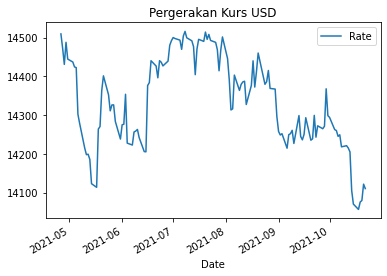

In [15]:
import matplotlib.pyplot as plt

df.plot(title='Pergerakan Kurs USD')

Data diatas merupakan data pergerakan kurs USD terhadap IDR yang diambil selama 5 bulan terakhir yaitu semenjak bulan Mei - Oktober 2021

Insights yang dapat diambil dari plot pergerakan kurs USD diatas:

1. Kurs dollar tertinggi terdapat pada bulan Juli
2. Kurs dollar terendah terdapat pada bulan Oktober
3. Kurs dollar mengalami dua kali lonjakan tertinggi yang terjadi pada pertengahan bulan Mei dan Juni
4. Penurunan kurs dollar paling signifikan terjadi pada bulan Mei
5. Pada bulan September, pergerakan kurs dollar cenderung lebih stabil ketimbang pada bulan lainnya

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.